## 第一部分

### 简答题

1. 为什么激活函数是训练一个多层感知机（MLP）的关键要素
因为如果没有激活函数，多层感知机就是一个普通的线性变换。激活函数通过引入非线性，使网络能够学习任意复杂的非线性决策边界，是 MLP 能够逼近任意连续函数（通用近似定理）的关键。

2. 列举三种常用的激活函数，说明一下它们的大概形状
Sigmoid:S 形，输出在 (0,1)
tanh:S 形，输出在 (−1,1)
RelU:左侧为 0，右侧为斜率 1 的直线

3. 反向传播的算法解决什么问题，如何工作的
计算损失函数偏置的梯度，这样可以更新梯度下降的参数。
工作流程：
前向传播得到预测 ŷ。
计算损失 L(ŷ,y)。
从输出层开始，利用链式法则反向计算每一层的局部梯度：
δ^(l)=((W^(l+1))ᵀδ^(l+1))⊙σ′(z^(l))
利用 δ 求出 ∂L/∂W、∂L/∂b，更新参数：
W←W−η·∂L/∂W，b←b−η·∂L/∂b。

4. 列出可以在基本MLP（不考虑其他神经网络架构）中进行调整的所有超参数？如果MLP过拟合训练数据，如何调整这些超参数来解决该问题？
隐藏层数，每层神经元数，L2正则化系数，Dropout概率，学习率，训练轮数（epochs），batch _Size
如果过拟合：减小层数，减少每层神经元，增大L2系数，增大Dropout，减小学习率，提前停止，batch _Size适当增大

5. 假设有一个MLP，该MLP由一个输入层，10个特征，随后是一个包含50个神经元的隐藏层，最后是3个神经元组成的输出层。所有人工神经元都使用ReLU激活函数。

   a. 输入矩阵X的形状是什么
（N,10)
   b. 隐藏层的权重W_hidden及其偏置b_hidden的形状分别是什么
  分别是(10,50)和(50,)
   c. 输出层的权重W_output及其偏置b_output的形状是什么
  分别是（50，3）和（3，）
   d. 网络输出矩阵Y的形状是什么
  （N，3）
   e. 写出输出矩阵Y的计算公式，满足Y是W_hidden, b_hidden, W_output, b_output的函数
Z1 = X @ W_hidden + b_hidden
A1 = ReLU(Z1)
Z2 = A1 @ W_output + b_output
Y  = ReLU(Z2)

6. 如果要将电子邮件分类为垃圾邮件或正常邮件，需要在输出层中有多少个神经元？应该在输出层中使用什么激活函数？相反，如果想解决MNIST图片分类问题，则在输出层中需要有多少个神经元，应该使用哪种激活函数？如何使神经网络预测 回归话题里提到的房价？
如果要将电子邮件分类为垃圾邮件或正常邮件，只需要用1个神经元，用sigmoid 函数;
如果想解决MNIST图片分类问题, 需要用10个神经元，用softmax 函数;

### 编程题

在MNIST数据集上训练深度MLP（可以使用tf.keras.datasets.mnist.load_data()加载它）。看看是否可以通过手动调整超参数获得98%以上的精度。

首先尝试使用课堂上介绍的方法搜索最佳学习率（即通过以指数方式增加学习率，根据学习率变化绘制训练损失，并找到损失激增的点）。

接下来，尝试使用Keras Tuner调整超参数——保存检查点，使用早停，并使用TensorBoard绘制学习曲线。

## 第二部分

第二部分要求构建一个基本的softmax回归算法，以及一个简单的两层神经网络。将使用原生Python（使用numpy库），不借助keras实现这些算法

在此过程中，将提供一些关于如何实现这些不同函数的指导，但总体而言，细节需要自己实现。 应该尽量使用 numpy 中的线性代数调用：for/while循环通常会使代码运行速度比预期慢得多。

**请仔细阅读作业说明!!!**

去命令行（cmd/Anaconda Powershell Prompt /其他终端）运行如下指令（激活开发环境一定要最先执行），安装这部分作业依赖的python库：
- 激活开发环境：conda activate homl3
- 安装numdifftools：conda install numdifftools
- 安装pytest：conda install pytest


### 第一题：简单的加法函数，以及使用pytest测试代码

为了说明这部分作业的代码+数据，以及pytest使用，将使用一个实现 add函数 的简单示例。

```
data/
    train-images-idx3-ubyte.gz
    train-labels-idx1-ubyte.gz
    t10k-images-idx3-ubyte.gz
    t10k-labels-idx1-ubyte.gz
src/
    simple_nn.py
tests/
    test_simple_nn.py
```

data/ 目录包含这部分作业所需的数据（MNIST 数据集的副本）；src/ 目录包含实现功能所需的源代码；tests/ 目录包含用于测试实现代码是否正确的代码

第一题要求实现 src/目录里 simple_nn.py内的 add函数（这个简单的函数实际上并没有用到，它只是一个帮助熟悉作业结构的示例）。查看 src/simple_nn.py 文件，将找到 add() 函数的定义

```python
def add(x, y):
    """一个简单的add函数，以便熟悉自动测试（pytest）

    Args:
        x (Python数字 或者 numpy array)
        y (Python数字 或者 numpy array)

    Return:
        x+y的和
    """
    ### 你的代码开始
    pass
    ### 你的代码结束
```

函数内的文档字符串（docstring）定义了函数应该产生的预期输入和输出（需要养成仔细阅读文档的习惯，很多错误来源就是没有阅读规范）。实现这个函数。你只需将 pass 语句替换为正确的代码即可，即：

```python
def add(x, y):
    """一个简单的add函数，以便熟悉自动测试（pytest）

    Args:
        x (Python数字 或者 numpy array)
        y (Python数字 或者 numpy array)

    Return:
        x+y的和
    """
    ### 你的代码开始
    return x + y
    ### 你的代码结束
```

现在可以去src/simple_nn.py里，把add函数里的pass 换成 return x + y

#### 测试代码

现在需要测试一下你的代码是否能正确运行，正确运行才说明实现没问题。

在这部分作业中，将使用pytest对代码进行单元测试。在 src/simple_nn.py 文件中 写完 add函数的实现后，去命令行里确保已经激活了homl3环境（conda activate homl3）， 确保homl3环境里安装过了numdifftools和pytest，确定命令行里显示的文件路径在 作业8的目录（这个目录同时有data/, src/和tests/文件夹），然后执行以下命令：

python -m pytest -k "add"

如果一切正常，你会看到类似这样的图片：
![测试add通过](../../images/homework/neural_network/p1.png)

想看测试如何进行的，可以去查看tests/test_simple_nn.py文件，python -m pytest -k "add"指令刚刚运行的是 文件里的test_add() 函数

如果错误地实现了某些内容（例如，将上面的 x + y 更改为 x - y），那么测试将会失败，并且 pytest 将会指示相应的测试失败。

比如把x+y，换成x-y后，执行python -m pytest -k "add"：
![测试add不通过](../../images/homework/neural_network/p2.png)

如图所见，将收到一个错误，指示断言失败，然后就可以使用它来返回并调整实现代码。应该能够熟练地阅读和跟踪测试文件，以便更好地理解正确的实现应该如何工作

学习正确开发和使用单元测试对于现代软件开发至关重要，希望这次作业帮助了解单元测试在软件开发中的典型用法。

当然，这次作业不一定需要编写自己的测试去确保自己实现正确，但应该熟悉如何阅读提供的测试文件，以便了解要实现的函数应该如何运行。但是，也绝对鼓励为自己的实现编写额外的测试。

如果习惯通过打印语句调试代码，请注意，pytest 默认会捕获任何输出（隐藏掉测试代码执行的print）。可以通过将 -s 传递给 pytest 来禁用此行为并让测试在所有情况下显示所有输出。

### 第二题：用gzip和struct处理压缩文件和二进制数据，加载MNIST数据

现在已经熟悉了测试工具pytest，接下来在 src/simple_nn.py 中需要实现的函数上尝试一下：parse_mnist_data() 函数。

这个函数也有文档字符串（docstring），请仔细阅读它们。

然后，请访问 https://web.archive.org/web/20220509025752/http://yann.lecun.com/exdb/mnist/ 了解 MNIST 数据的二进制格式。然后编写函数读取此类文件，并根据文档字符串中的规范返回 numpy 数组）。建议使用 Python 中的 struct 模块（以及 gzip 模块，当然还有 numpy 本身）来实现此函数。

当然可以利用AI搜索这个部分的代码实现，但了解了MNIST数据的二进制格式和gzip，struct的简单使用后，能理解AI产出的代码为什么正确

实现函数后，去命令行运行本地单元测试， 同样确保命令行激活了homl3环境，确保路径在作业8目录下（有data/,src/和tests/ 文件夹）， 后面的题不再强调

python -m pytest -k "parse_mnist"

### 第三题：Softmax损失

在 `src/simple_nn.py` 文件的 `softmax_loss()` 函数中实现 softmax（也称为交叉熵）损失。对于一个可以取值 $ y \in \{1, \ldots, k\} $ 的多类输出，softmax 损失接收一个对数几率向量 $ z \in \mathbb{R}^k $ 和真实类别 $ y \in \{1, \ldots, k\} $ 作为输入，并返回由以下公式定义的损失：

$\ell_{\text{softmax}}(z, y) = \log (\sum_{i=1}^{k} \exp z_i) - z_y$

对数几率向量z，可以看成被softmax激活之前的值，对公式有疑惑，或者对z的意义有疑惑的，可以参考softmax回归的笔记，并自己推导一下损失公式是否正确

请注意，如其文档字符串（docstring）所述，`softmax_loss()` 函数接收一个二维的对数几率数组（即，一批不同样本的 $ k $ 维对数几率）加上一个对应的一维真实标签数组，并应返回整批样本的平均 softmax 损失。请注意，为了正确实现此功能，你不应使用任何循环，而是完全使用 numpy 的向量化操作进行计算（为此设定预期，实现代码可以少到一行代码）。

实现完成后，可以去命令行进行单元测试：python -m pytest -k "softmax_loss"

### 第四题：softmax回归小批量梯度下降

在这个问题中，你将实现（线性）softmax 回归的小批量梯度下降）。考虑一个假设函数，该函数通过以下公式将 $ n $ 维输入转换为 $ k $ 维对数几率：

$h(x) = \Theta^T x$

其中 $ x \in \mathbb{R}^n $ 是输入，$\Theta \in \mathbb{R}^{n \times k}$ 是模型参数。给定数据集 $\{(x^{(i)} \in \mathbb{R}^n, y^{(i)} \in \{1, \ldots, k\})\}$，其中 $ i = 1, \ldots, m $，softmax 回归相关的优化问题因此由下式给出：

$\text{minimize} \frac{1}{m} \sum_{i=1}^{m} \ell_{\text{softmax}} (\Theta^T x^{(i)}, y^{(i)})$

线性 softmax 目标的梯度由下式给出，有疑惑的可以结合softmax回归的笔记验证

$\nabla_\Theta \ell_{\text{softmax}} (\Theta^T x, y) = x(z - e_y)^T$

其中

$z = \frac{\exp(\Theta^T x)}{1^T \exp(\Theta^T x)} = \text{normalize}(\exp(\Theta^T x))$

（即 $ z $ 只是归一化的 softmax 概率），并且 $ e_y $ 表示 y 分类的独热编码，即一个所有元素为零，只有第 $ y $ 个位置为 1 的向量。

也可以用更紧凑的符号来表示，方便代码实现，即，如果让 $ X \in \mathbb{R}^{m \times n} $ 表示某个 $ m $ 个输入的特征矩阵（整个数据集或一个小批量），$ y \in \{1, \ldots, k\}^m $ 是对应的标签向量，并且 $ \ell_{\text{softmax}} $ 表示平均 softmax 损失，那么

$\nabla_\Theta \ell_{\text{softmax}}(X \Theta, y) = \frac{1}{m} X^T (Z - I_y)$

其中

$Z = \text{normalize}(\exp(X \Theta)) \quad (\text{归一化按行应用})$

表示对数几率矩阵，而 $ I_y \in \mathbb{R}^{m \times k} $ 表示 $ y $ 中标签的 逐个转成 独热编码，按行连接

使用这些梯度，实现 `softmax_regression_epoch()` 函数，该函数使用指定的学习率/步长 $ \eta $ 和小批量大小 `batch_size` 运行单个轮次（对数据集的一次遍历）。如其文档字符串所述，你的函数应该就地修改 Theta 数组。实现后，请去命令行运行测试。

python -m pytest -k "softmax_regression_epoch"

#### 用softmax回归训练MNIST

虽然这不包含在测试中，但既然你已经编写了这段代码，你也可以尝试使用 SGD 训练一个完整的 MNIST 线性分类器。为此，你可以使用 src/simple_nn.py 文件中的 train_softmax() 函数（已经编写好了这个函数，所以无需自行编写，但可以查看一下它的功能）。

可以使用以下代码了解它的工作原理。作为参考，如下所示，我的实现在 notebook 上运行时间约为 2 秒，测试集错误率为 7.97%。

In [3]:
import sys
sys.path.append("src/")
from simple_nn import train_softmax, parse_mnist

X_tr, y_tr = parse_mnist("data/train-images-idx3-ubyte.gz",
                         "data/train-labels-idx1-ubyte.gz")
X_te, y_te = parse_mnist("data/t10k-images-idx3-ubyte.gz",
                         "data/t10k-labels-idx1-ubyte.gz")

train_softmax(X_tr, y_tr, X_te, y_te, epochs=10, lr=0.2, batch=100)

| Epoch | Train Loss | Train Err | Test Loss | Test Err |
|     0 |    0.35134 |   0.10182 |   0.33588 |  0.09400 |
|     1 |    0.32142 |   0.09268 |   0.31086 |  0.08730 |
|     2 |    0.30802 |   0.08795 |   0.30097 |  0.08550 |
|     3 |    0.29987 |   0.08532 |   0.29558 |  0.08370 |
|     4 |    0.29415 |   0.08323 |   0.29215 |  0.08230 |
|     5 |    0.28981 |   0.08182 |   0.28973 |  0.08090 |
|     6 |    0.28633 |   0.08085 |   0.28793 |  0.08080 |
|     7 |    0.28345 |   0.07997 |   0.28651 |  0.08040 |
|     8 |    0.28100 |   0.07923 |   0.28537 |  0.08010 |
|     9 |    0.27887 |   0.07847 |   0.28442 |  0.07970 |


### 在1个隐藏层的神经网络上进行小批量梯度下降

现在已经为线性分类器编写了SGD，现在考虑一个简单的两层神经网络的情况。具体来说，对于输入 $ x \in \mathbb{R}^n $，考虑一个形式如下的两层神经网络（无偏置项）：

$ z = W_2^T ReLU(W_1^T x) $

其中 $ W_1 \in \mathbb{R}^{n \times d} $ 和 $ W_2 \in \mathbb{R}^{d \times k} $ 表示网络的权重（具有 $ d $ 维隐藏单元），而 $ z \in \mathbb{R}^k $ 表示网络输出的对数几率。我们再次使用 softmax/交叉熵损失，这意味着我们要解决以下优化问题：

$\text{minimize } \frac{1}{W_1, W_2} \sum_{i=1}^m \ell_{\text{softmax}}(W_2^T ReLU(W_1^T x^{(i)}), y^{(i)})$

或者，使用矩阵 $ X \in \mathbb{R}^{m \times n} $ 来描述批量形式，这也可以写成：

$\text{minimize } \ell_{\text{softmax}}(ReLU(XW_1)W_2, y)$

使用链式法则，可以推导出该网络的反向传播更新（为了便于实现，这里提供最终形式）。具体来说，令：

$Z_1 \in \mathbb{R}^{m \times d} = ReLU(XW_1)$

$G_2 \in \mathbb{R}^{m \times k} = \text{normalize}(\exp(Z_1 W_2)) - I_y$

$G_1 \in \mathbb{R}^{m \times d} = 1\{Z_1 > 0\} \circ (G_2 W_2^T)$

其中 $ 1\{Z_1 > 0\} $ 是一个二进制矩阵，其条目根据 $ Z_1 $ 中的每个项是否严格为正而等于零或一，而 $\circ$ 表示逐元素乘法。那么目标的梯度由下式给出：

$\nabla_{W_1} \ell_{\text{softmax}}(ReLU(XW_1)W_2, y) = \frac{1}{m} X^T G_1$

$\nabla_{W_2} \ell_{\text{softmax}}(ReLU(XW_1)W_2, y) = \frac{1}{m} Z_1^T G_2$

**注意：** 如果这些精确方程的细节对你来说有点神秘，不必太担心。这些只是两层ReLU网络的标准反向传播方程：$ Z_1 $ 项只是计算"前向"传播，而 $ G_2 $ 和 $ G_1 $ 项表示反向传播。但是更新的精确形式可能会因你使用的神经网络符号、制定损失函数的具体方式、是否之前以矩阵形式推导过这些等因素而有所不同。（毕竟，在某种程度上，深度学习系统（比如tensorflow）的整个重点是我们不需要费心进行这些手动计算）。


使用这些梯度，现在在 src/simple_nn.py 文件中编写 nn_epoch() 函数。与上一个问题一样，你的解决方案应该修改 W1 和 W2 数组。实现该函数后，运行以下测试。请务必使用上述表达式所示的矩阵运算来实现该函数：这比尝试使用循环更快、更高效（并且所需的代码也更少）。

实现完成后，去命令运行单元测试：python -m pytest -k "nn_epoch"

#### 训练神经网络

In [11]:
import sys


import importlib
import simple_nn
importlib.reload(simple_nn) # 重新载入simple_nn， 防止刚才的训练代码产生了缓存，影响了simple_nn

sys.path.append("src/")
from simple_nn import train_nn, parse_mnist

X_tr, y_tr = parse_mnist("data/train-images-idx3-ubyte.gz",
                         "data/train-labels-idx1-ubyte.gz")
X_te, y_te = parse_mnist("data/t10k-images-idx3-ubyte.gz",
                         "data/t10k-labels-idx1-ubyte.gz")
train_nn(X_tr, y_tr, X_te, y_te, hidden_dim=400, epochs=20, lr=0.2)

| Epoch | Train Loss | Train Err | Test Loss | Test Err |
|     0 |    0.15324 |   0.04697 |   0.16305 |  0.04920 |
|     1 |    0.09830 |   0.02912 |   0.11569 |  0.03620 |
|     2 |    0.07491 |   0.02217 |   0.09840 |  0.03240 |
|     3 |    0.05956 |   0.01710 |   0.08756 |  0.02820 |
|     4 |    0.04898 |   0.01365 |   0.08178 |  0.02610 |
|     5 |    0.04061 |   0.01097 |   0.07723 |  0.02420 |
|     6 |    0.03476 |   0.00913 |   0.07429 |  0.02380 |
|     7 |    0.03017 |   0.00762 |   0.07241 |  0.02260 |
|     8 |    0.02661 |   0.00637 |   0.07115 |  0.02220 |
|     9 |    0.02362 |   0.00555 |   0.07003 |  0.02160 |
|    10 |    0.02109 |   0.00462 |   0.06911 |  0.02130 |
|    11 |    0.01910 |   0.00395 |   0.06822 |  0.02060 |
|    12 |    0.01718 |   0.00335 |   0.06755 |  0.02120 |
|    13 |    0.01555 |   0.00292 |   0.06696 |  0.02130 |
|    14 |    0.01413 |   0.00235 |   0.06656 |  0.02100 |
|    15 |    0.01295 |   0.00207 |   0.06609 |  0.02080 |
|    16 |    0

作为参考，我的实现花了30多秒训练，最终在mnist的测试集达到了1.93%的错误率，只用了大概20多行代码

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import subplot

# 设置中文字体（SimHei）
matplotlib.rcParams['font.family'] = 'SimHei'
# 防止负号显示为方块
matplotlib.rcParams['axes.unicode_minus'] = False
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import TensorBoard

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
#X_train数据信息

print(X_train.dtype)
print(X_train.shape)
#X_test数据信息

print(X_test.dtype)
print(X_test.shape)
#x_train,X_test数据转换为'float32'

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = X_train[..., None]
X_test = X_test[..., None]
#定义模型
inputs = Input(shape=(28, 28, 1))
x = Flatten()(inputs)  #变为1维数据
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

uint8
(60000, 28, 28)
uint8
(10000, 28, 28)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________________________

In [2]:
class ExponentialLRSchedule(tf.keras.callbacks.Callback):
    def __init__(self, lr0=3e-3, gamma=1.01, max_lr=3.0):
        super().__init__()
        self.lr0, self.gamma, self.max_lr = lr0, gamma, max_lr
        self.lrs, self.losses = [], []

    def on_batch_end(self, batch, logs=None):
        loss = logs.get('loss')
        if np.isnan(loss):
            self.model.stop_training = True
            return
        lr = min(self.lr0 * (self.gamma ** batch), self.max_lr)
        self.model.optimizer.learning_rate.assign(lr)
        self.lrs.append(float(lr))
        self.losses.append(loss)


#编译
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Range-Test
exp = ExponentialLRSchedule(lr0=3e-3, gamma=1.01)
model.fit(X_train, y_train,
          epochs=3,
          batch_size=256,
          validation_split=0.2,
          callbacks=[exp],
          verbose=0)



Range-Test 损失激增点 ≈ 1.928e-02


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

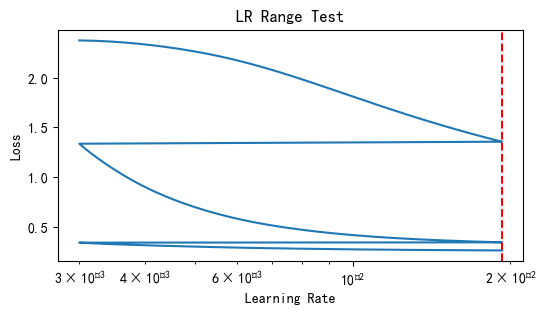

In [3]:
losses = np.array(exp.losses)
lrs    = np.array(exp.lrs)
smooth = 0.98
s = losses[0]
smooth_loss = [s]
for v in losses[1:]:
    s = s*smooth + v*(1-smooth)
    smooth_loss.append(s)
smooth_loss = np.array(smooth_loss)

grad      = np.gradient(smooth_loss)
threshold = grad.max() * 0.2
spike_idx = np.where(grad > threshold)[0]
spike_lr  = lrs[spike_idx[0]] if spike_idx.size else lrs[-1]
print(f'Range-Test 损失激增点 ≈ {spike_lr:.3e}')

plt.figure(figsize=(6,3))
plt.semilogx(lrs, smooth_loss)
plt.axvline(spike_lr, color='r', linestyle='--')
plt.title('LR Range Test'); plt.xlabel('Learning Rate'); plt.ylabel('Loss')
plt.show()

In [4]:
# 正式训练
best_lr = spike_lr * 0.9
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=best_lr, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=0)


In [5]:
#评估
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Model Accuracy = {accuracy:.4f}")
print(f"Model loss = {loss:.4f}")

Model Accuracy = 0.9780
Model loss = 0.1085


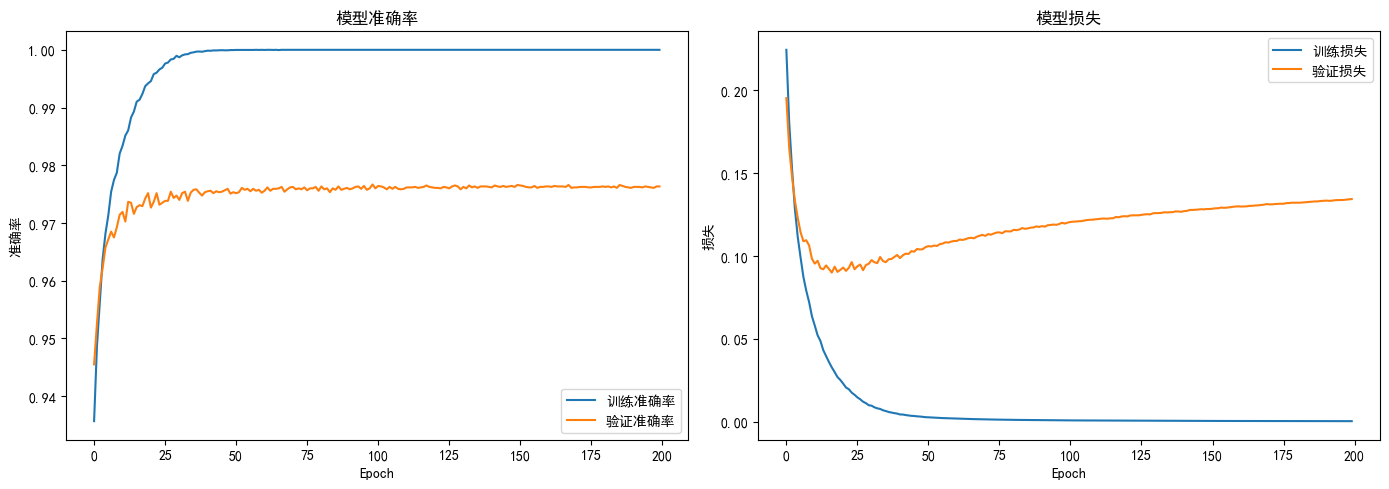

In [6]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('模型准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('模型损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import datetime
import os

# 1) 数据
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train[..., None]
X_test = X_test[..., None]


#定义模型
def build_model(hp):
    inputs = tf.keras.Input(shape=(28, 28, 1))
    x = tf.keras.layers.Flatten()(inputs)

    #三个隐藏层
    for i in range(hp.Int('num_layers', 1, 3, step=1)):
        #神经元数
        units = hp.Choice(f'units_{i}', [32, 64, 128])
        x = tf.keras.layers.Dense(units, kernel_initializer='he_normal')(x)
        #批量归一化
        x = tf.keras.layers.BatchNormalization()(x)
        #激活函数
        act = hp.Choice(f'act_{i}', ['relu', 'tanh', 'sigmoid'])
        x = tf.keras.layers.Activation(act)(x)

        x = Dropout(hp.Float(f'drop_{i}', 0.0, 0.5, step=0.1))(x)

    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    # 可调：学习率
    lr = hp.Float('lr', 1e-4, 1e-2, sampling='log')

    # 可调：优化器
    optimizers_name = hp.Choice('optimizers', ['adam', 'sgd'])
    if optimizers_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


#启动目录
log_dir = datetime.datetime.now().strftime('%m%d-%H%M%S')
project_name = f'hp_tuning_{log_dir}'

total_callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ModelCheckpoint(f'best_{log_dir}.h5', save_best_only=True, monitor='val_accuracy'),
    TensorBoard(log_dir=os.path.join('logs', project_name))
]

#调参器
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    directory='kt_mnist',
    project_name=project_name
)

# 正式训练
# 类似fix
batch_size = [64, 128, 256, 512]
for b_s in batch_size:
    tuner.search(X_train, y_train,
                 epochs=40,
                 batch_size=b_s,
                 validation_split=0.2,
                 callbacks=total_callbacks,
                 verbose=0)

#输出结果
best_model = tuner.get_best_models(1)[0]
best_hp = tuner.get_best_hyperparameters(1)[0]
print("最佳超参：", best_hp.values)

val_loss, val_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"验证集准确率 = {val_acc:.4f}")

I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


I:\Anaconda\envs\homl3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


最佳超参： {'num_layers': 2, 'units_0': 128, 'act_0': 'relu', 'drop_0': 0.1, 'lr': 0.01, 'optimizers': 'adam', 'units_1': 128, 'act_1': 'relu', 'drop_1': 0.30000000000000004, 'units_2': 64, 'act_2': 'relu', 'drop_2': 0.0}
验证集准确率 = 0.9809


In [ ]:
def parse_mnist(image_filesname, label_filename):

    f = gzip.open(image_filesname)
    data = f.read()
    f.close()
    h = struct.unpack_from('>IIII', data, 0)
    offset = struct.calcsize('>IIII')
    imgNum = h[1]
    rows = h[2]
    columns = h[3]
    pixelString = '>' + str(imgNum * rows * columns) + 'B'
    pixels = struct.unpack_from(pixelString, data, offset)
    X = np.reshape(pixels, [imgNum, rows * columns]).astype('float32')
    X_max = np.max(X)
    X_min = np.min(X)
    # X_max = np.max(X, axis=1, keepdims=True)
    # X_min = np.min(X, axis=1, keepdims=True)

    X_normalized = ((X - X_min) / (X_max - X_min))


    f = gzip.open(label_filename)
    data = f.read()
    f.close()
    h = struct.unpack_from('>II', data, 0)
    offset = struct.calcsize('>II')
    num = h[1]
    labelString = '>' + str(num) + 'B'
    labels = struct.unpack_from(labelString, data, offset)
    y = np.reshape(labels, [num]).astype('uint8')

    return (X_normalized,y)

In [ ]:
def softmax_loss(Z, y):
    m = Z.shape[0]
    Z1 = np.log(np.sum(np.exp(Z), axis=1)).T
    Z2 = Z[np.arange(0, m), y]
    return np.mean(Z1-Z2)

In [ ]:
def softmax(x):

    orig_shape = x.shape
    if len(x.shape) > 1:
        # Matrix
        tmp = np.max(x, axis=1)
        x -= tmp.reshape((x.shape[0], 1))
        x = np.exp(x)
        tmp = np.sum(x, axis=1)
        x /= tmp.reshape((x.shape[0], 1))
    else:
        # Vector
        tmp = np.max(x)
        x -= tmp
        x = np.exp(x)
        tmp = np.sum(x)
        x /= tmp

    assert x.shape == orig_shape
    return x

In [ ]:
def softmax_regression_epoch(X, y, theta, lr = 0.1, batch=100):

    k = theta.shape[1]
    m = X.shape[0]

    for i in range(0, m, batch):
      X_batch = X[i:i+batch]
      y_batch = y[i:i+batch]

      y_pre = np.dot(X_batch, theta)

      Z = softmax(y_pre)
      I = np.eye(k)[y_batch]
      g = np.dot(X_batch.T, Z - I) / batch

      theta[:,:] = theta[:,:] - lr * g